In [1]:
# Import necessary libraries
from sklearn.linear_model import *
from sklearn.metrics import *
from sklearn.linear_model import *
from sklearn.model_selection import *
from sklearn.compose import *
from sklearn.svm import SVC
from sklearn.tree import *
from sklearn.model_selection import *
from sklearn.model_selection import *
from sklearn.discriminant_analysis import *
from sklearn.preprocessing import *
from sklearn.neighbors import *
from sklearn.naive_bayes import *
from sklearn.pipeline import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.linear_model import *
import os

warnings.simplefilter('ignore')

os.chdir('D:\Kaggle_Compititions\wild_berry\playground-series-s3e14')

berry = pd.read_csv('train.csv',index_col=0)
berry

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
id,,,,,,,,,,,,,,,,,
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15284,12.5,0.25,0.25,0.38,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.556302,0.476308,40.546480,7667.83619
15285,12.5,0.25,0.25,0.25,0.50,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.354413,0.388145,29.467434,3680.56025
15286,25.0,0.50,0.25,0.38,0.75,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.422548,0.416786,32.299059,4696.44394


In [2]:
# Drop the 'yield' column from the berry dataset and assign the remaining columns to x
x = berry.drop(['yield'], axis=1)

# Assign the 'yield' column from the berry dataset to y
y = berry['yield']

In [3]:
# Split the dataset into training and testing sets
# x and y are the feature and target variables, respectively
# test_size=0.3 means 30% of the data will be used for testing
# random_state=24 sets the random seed for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=24)

# Create a Decision Tree Regressor model
# random_state=24 sets the random seed for reproducibility
# max_depth=2 limits the maximum depth of the decision tree to 2 levels
dtr = DecisionTreeRegressor(random_state=24, max_depth=2)

# Train the Decision Tree Regressor model on the training data
dtr.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=24)

 # decision tree

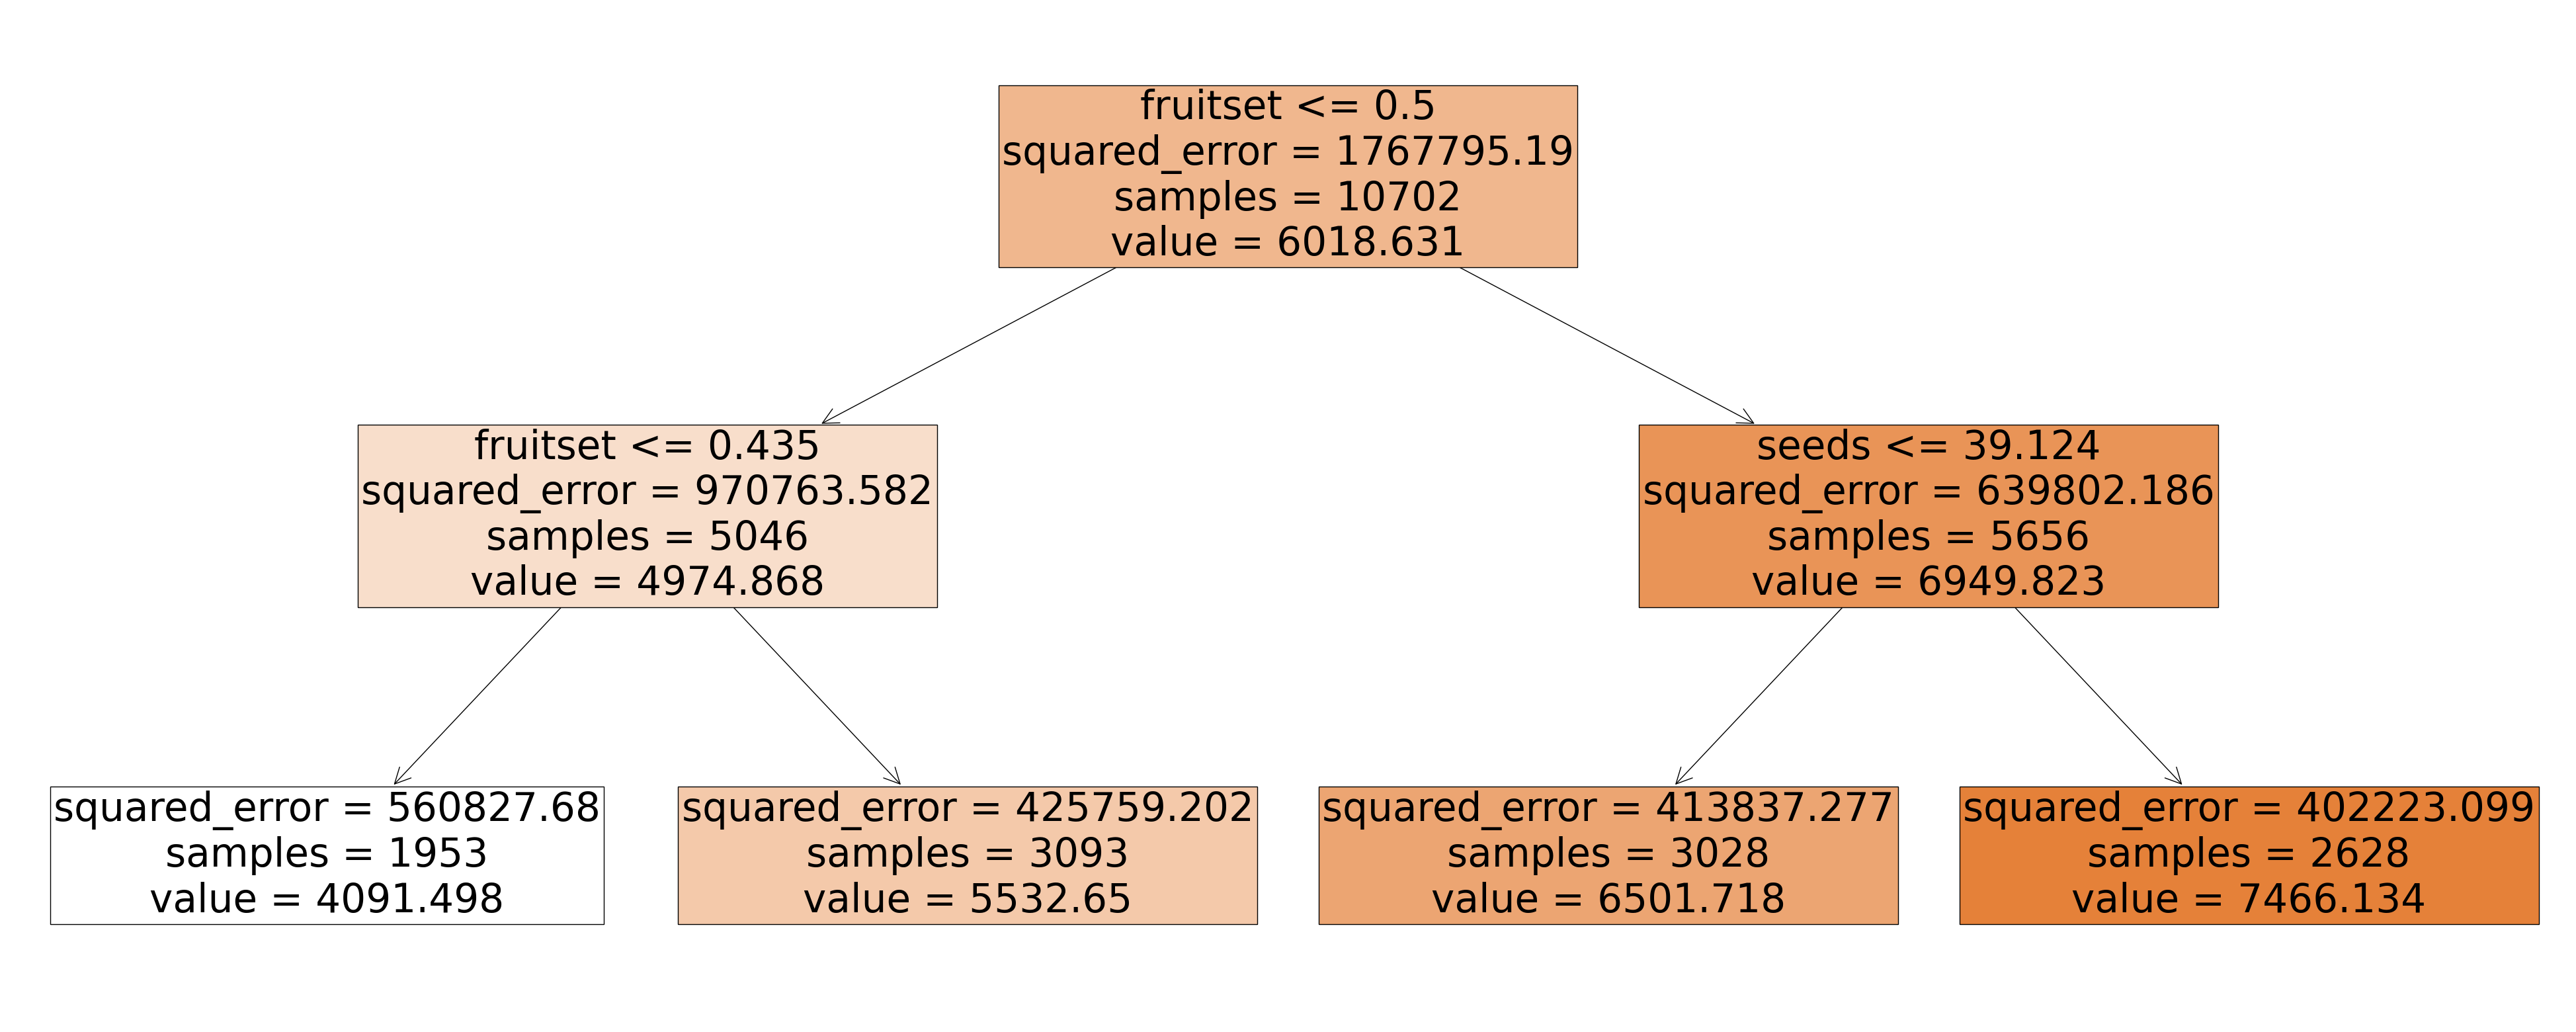

In [4]:
# Create a figure with a larger size to accommodate the tree
plt.figure(figsize=(50, 20))

# Plot the decision tree
# dtr is the trained Decision Tree Regressor model
# feature_names=x_train.columns provides the feature names for the tree
# class_names=['0', '1'] sets the class names for the tree (not applicable for regression)
# filled=True fills the tree nodes with colors
# fontsize=43 sets the font size for the tree
plot_tree(dtr, feature_names=x_train.columns, class_names=['0', '1'], filled=True, fontsize=43)

# Display the plot
plt.show()

In [5]:
# Use the trained Decision Tree Regressor model to make predictions on the test data
y_pred = dtr.predict(x_test)

# Calculate the R-squared (coefficient of determination) score
# y_test is the true target values
# y_pred is the predicted target values
r2 = r2_score(y_test, y_pred)

# Print the R-squared score
print(r2)

0.7340686494916537


# gridsearch cv

In [6]:
# Define the hyperparameter grid for the Decision Tree Regressor
params = {
    'max_depth': [2, 5, 7, 10, 13, None],
    'min_samples_split': [2, 5, 7, 10, 13],
    'min_samples_leaf': [1, 5, 7, 0, 10, 13]
}

# Create a 5-fold cross-validation object with shuffling and a random state of 24
kfold = KFold(n_splits=5, shuffle=True, random_state=24)

# Create a Decision Tree Regressor model with a random state of 24
dtr = DecisionTreeRegressor(random_state=24)

# Create a GridSearchCV object to perform hyperparameter tuning
# dtr is the base estimator
# param_grid=params is the hyperparameter grid to search
# cv=kfold is the cross-validation object
# scoring='neg_mean_absolute_error' is the evaluation metric to use (negative mean absolute error)
gcv = GridSearchCV(dtr, param_grid=params, cv=kfold, scoring='neg_mean_absolute_error')

# Fit the GridSearchCV object to the data
gcv.fit(x, y)

# Print the best hyperparameters found by the grid search
print(gcv.best_params_)

# Print the best score (negative mean absolute error) achieved by the grid search
print(gcv.best_score_)

{'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 2}
-364.2658727411962


# Best tree

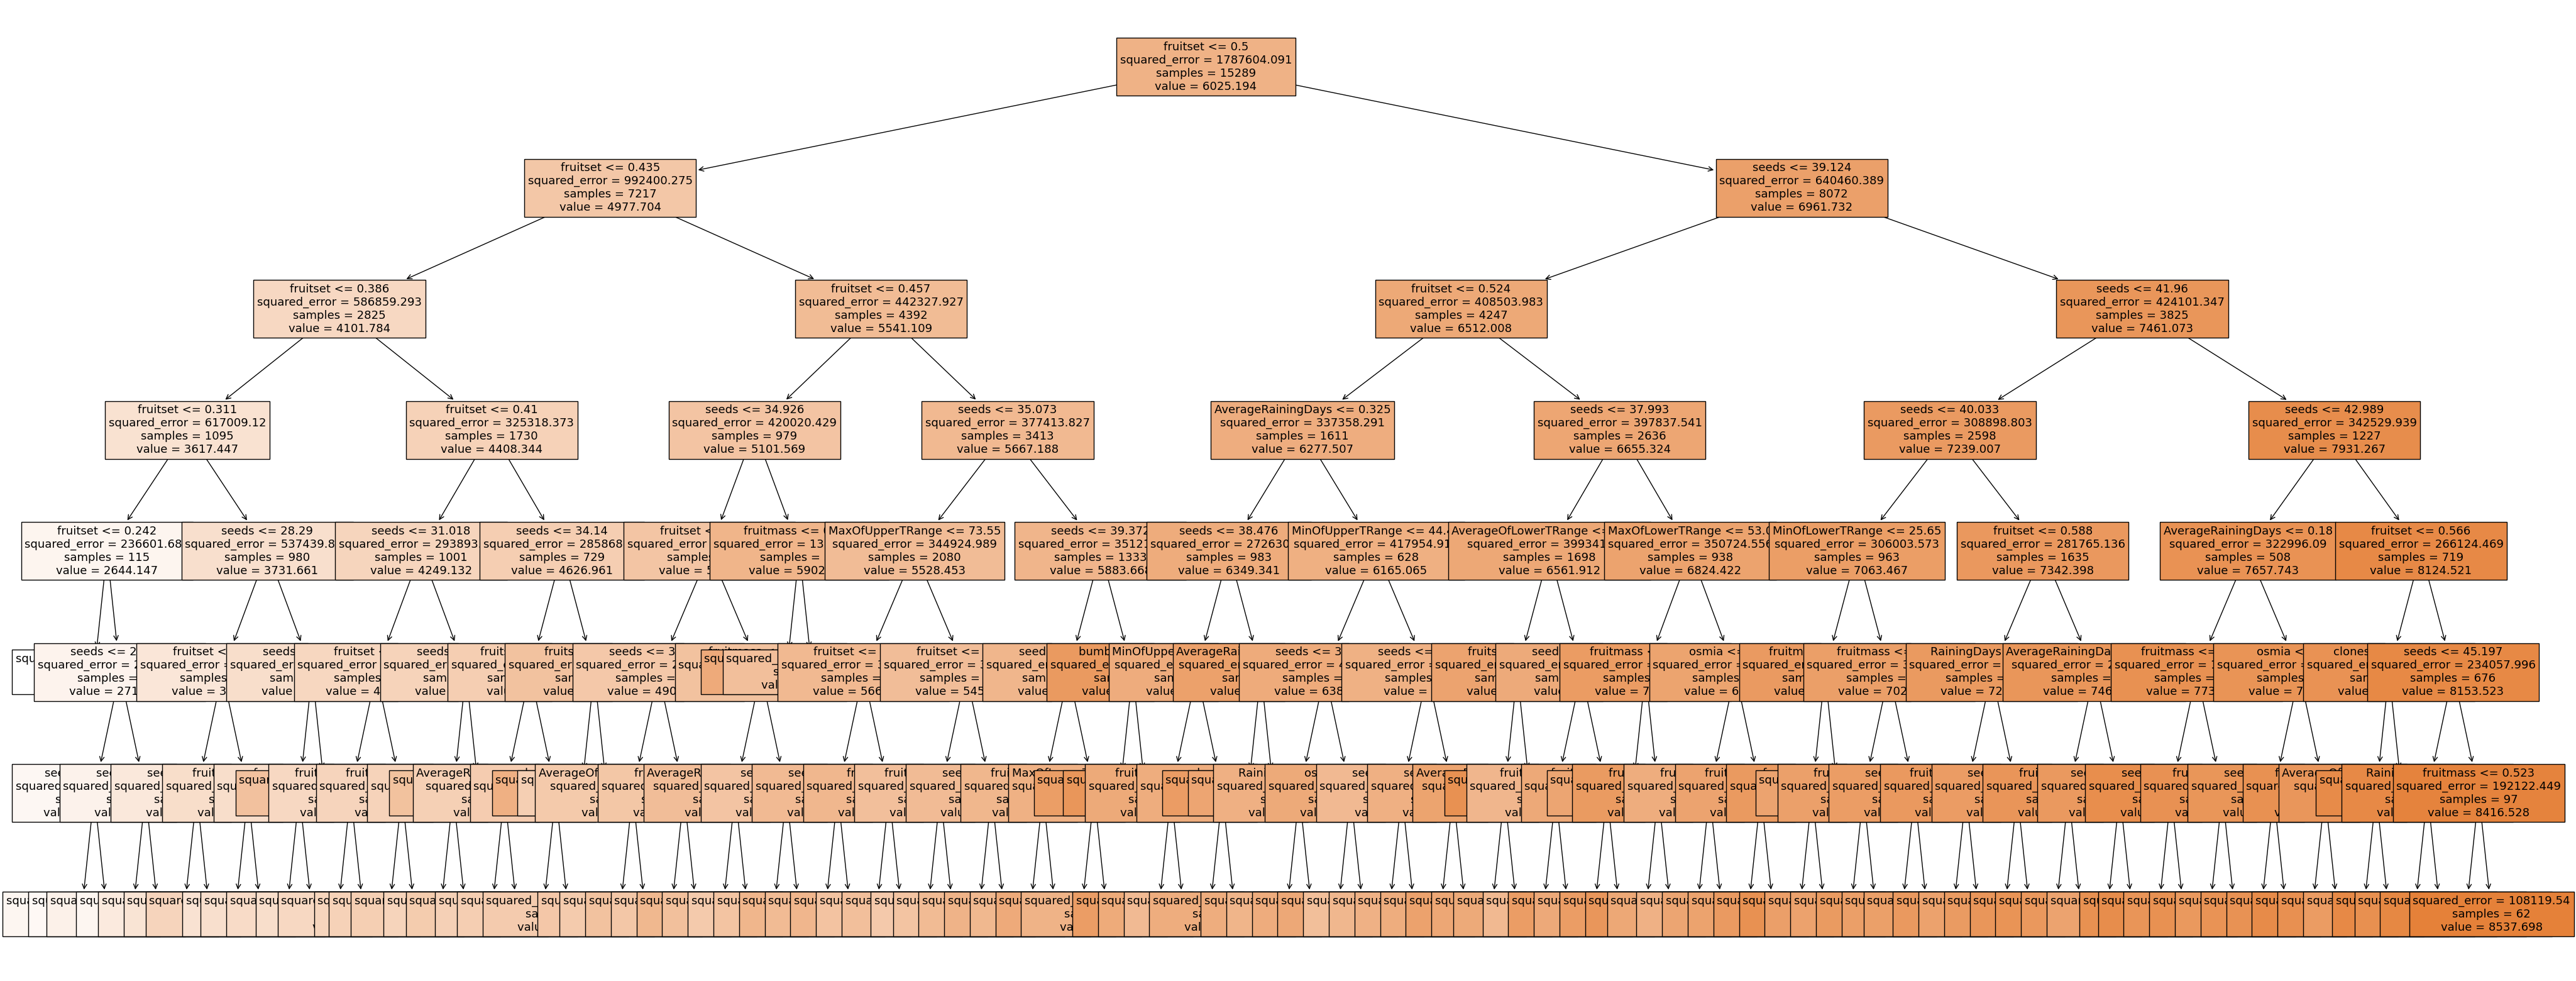

In [7]:
# Get the best estimator (Decision Tree Regressor) from the GridSearchCV object
best_tree = gcv.best_estimator_

# Create a figure with a larger size to accommodate the tree
plt.figure(figsize=(50, 20))

# Plot the best decision tree
# best_tree is the best estimator found by the GridSearchCV
# feature_names=x.columns provides the feature names for the tree
# class_names=['0', '1'] sets the class names for the tree (not applicable for regression)
# filled=True fills the tree nodes with colors
# fontsize=13 sets the font size for the tree
plot_tree(best_tree, feature_names=x.columns, class_names=['0', '1'], filled=True, fontsize=13)

# Display the plot
plt.show()

# feature importance

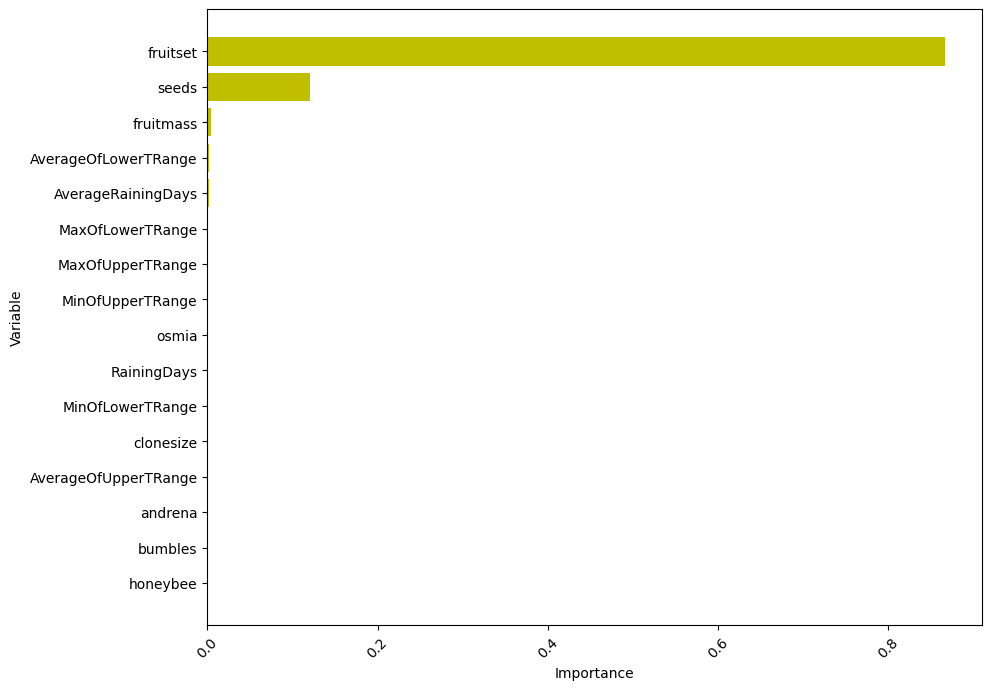

In [8]:
# Create a pandas DataFrame with the feature names and importances
pd_imp = pd.DataFrame({'var': list(x.columns), 'imp': best_tree.feature_importances_})

# Sort the DataFrame by the feature importances in ascending order
pd_imp.sort_values(by='imp', inplace=True)

# Create a horizontal bar plot of the feature importances
plt.figure(figsize=(10, 8))
plt.barh(pd_imp['var'], pd_imp['imp'], color='y')

# Set the x-axis label
plt.xlabel('Importance')

# Rotate the x-axis tick labels by 45 degrees
plt.xticks(rotation=45)

# Set the y-axis label
plt.ylabel('Variable')

# Display the plot
plt.show()

# inferencing

In [11]:
best_model = gcv.best_estimator_

# Load the test data into a DataFrame named "test"
test_data = pd.read_csv("test.csv",index_col=0)

pred_berry = best_model.predict(test_data)

# Load the sample submission file into a DataFrame named "submit"
submit = pd.read_csv("sample_submission.csv")

# Replace the predicted hardness values in the submission file
submit['yield'] = pred_berry

# Save the submission file with the predicted hardness values
submit.to_csv("D:/Kaggle_Compititions/wild_berry/playground-series-s3e14/wild_berry.csv", index=False)